In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import datetime
import math
import numpy as np
from scipy.stats import norm

In [2]:
bitcoin_df = pd.read_csv("BCHAIN-MKPRU.csv")
bitcoin_df.index = pd.DatetimeIndex(bitcoin_df["Date"])
bitcoin_df = bitcoin_df["Value"]
bitcoin_df

Date
2016-09-11      621.65
2016-09-12      609.67
2016-09-13      610.92
2016-09-14      608.82
2016-09-15      610.38
                ...   
2021-09-06    51769.06
2021-09-07    52677.40
2021-09-08    46809.17
2021-09-09    46078.38
2021-09-10    46368.69
Name: Value, Length: 1826, dtype: float64

In [3]:
gold_df = pd.read_csv("LBMA-GOLD.csv")
gold_df.index = pd.DatetimeIndex(gold_df["Date"])
gold_df = gold_df["USD (PM)"]
gold_df = gold_df.dropna()
gold_df

Date
2016-09-12    1324.60
2016-09-13    1323.65
2016-09-14    1321.75
2016-09-15    1310.80
2016-09-16    1308.35
               ...   
2021-09-06    1821.60
2021-09-07    1802.15
2021-09-08    1786.00
2021-09-09    1788.25
2021-09-10    1794.60
Name: USD (PM), Length: 1255, dtype: float64

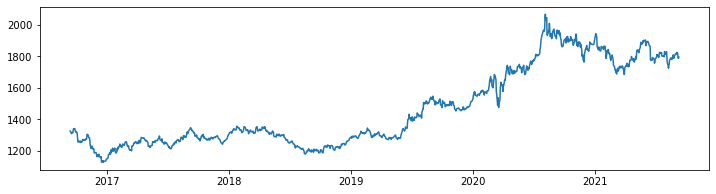

In [4]:
fig, ax = plt.subplots(1, figsize = (12, 3))
ax.plot(gold_df, label = "Gold")

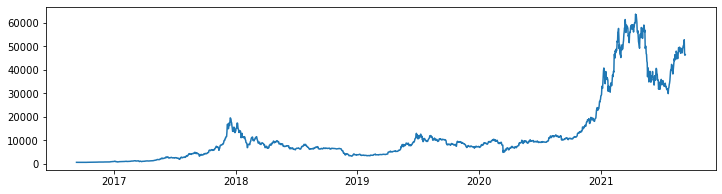

In [5]:
fig, ax = plt.subplots(1, figsize = (12, 3))
ax.plot(bitcoin_df, label = "Bitcoin")

In [6]:
# a list that keeps track of the trader's portfolio as [C, G, B]
portfolio = [1000, 0, 0]

alpha_g = 0.01
alpha_bc = 0.02

In [7]:
bitcoin_df.loc["2021-09-01"]

47155.87

In [8]:
gold_df.loc["2016-09-12"]

1324.6

In [9]:
"2016-12-28" in gold_df.index

True

In [10]:
# date must be a string formatted YYYY-MM-DD, from 2016-09-11 to 2021-09-10

def buy_bc(port, date, USD_spent):
    new_port = port.copy()
    USD_per_bc = bitcoin_df.loc[date]
    transaction_fee = alpha_bc * USD_spent
    bitcoin_gained = USD_spent / USD_per_bc
    
    new_port[0] -= (USD_spent + transaction_fee)
    new_port[2] += bitcoin_gained
    
    # built-in mechanism that doesn't 
    # let you trade beyond your means
    if (new_port[0] < 0):
        return port
    else:
        return new_port

In [11]:
def buy_gold(port, date, USD_spent):
    new_port = port.copy()
    USD_per_gold = gold_df.loc[date]
    transaction_fee = alpha_g * USD_spent
    gold_gained = USD_spent / USD_per_gold
    
    new_port[0] -= (USD_spent + transaction_fee)
    new_port[1] += gold_gained
    
    if (new_port[0] < 0):
        return port
    else:
        return new_port

In [12]:
def sell_bc(port, date, bc_sold):
    new_port = port.copy()
    USD_per_bc = bitcoin_df.loc[date]
    USD_gained = bc_sold * USD_per_bc
    transaction_fee = alpha_bc * USD_gained
    
    new_port[0] += (USD_gained - transaction_fee)
    new_port[2] -= bc_sold
    
    if (new_port[2] < 0):
        return port
    else:
        return new_port

In [13]:
def sell_gold(port, date, gold_sold): 
    new_port = port.copy()
    USD_per_gold = gold_df.loc[date]
    USD_gained = gold_sold * USD_per_gold
    transaction_fee = alpha_g * USD_gained
    
    new_port[0] += (USD_gained - transaction_fee)
    new_port[1] -= gold_sold
    
    if (new_port[1] < 0):
        return port
    else:
        return new_port

In [14]:
buy_bc(portfolio, "2021-09-01", 100)

[898.0, 0, 0.00212062676396385]

In [15]:
portfolio

[1000, 0, 0]

In [16]:
# takes in portfolio as a list, date as a string

def random_trade(port, date):
    new_port = port.copy()
    
    # means we CAN trade gold this day: 
    if date in gold_df.index:
        percentage = random.uniform(0, 1)
        new_port = buy_bc(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1)
        new_port = buy_gold(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1)
        new_port = sell_bc(new_port, date, percentage * new_port[2])
        
        percentage = random.uniform(0, 1)
        new_port = sell_gold(new_port, date, percentage * new_port[1])  
    else:
        percentage = random.uniform(0, 1)
        new_port = buy_bc(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1)
        new_port = sell_bc(new_port, date, percentage * new_port[2])
        
    return new_port
      

In [17]:
portfolio = [239.27795079064862, 0.002202293804955735, 0.03205691567792128]
random_trade(portfolio, "2016-12-23")


[119.73930554433367, 0.002202293804955735, 0.15757186728895142]

In [18]:
# from 2016-09-11 to 2021-09-10
date1 = '2016-09-11'
date2 = '2021-09-10'
mydates = pd.date_range(date1, date2).tolist()

In [19]:
portfolio = [1000, 0, 0]

for date in mydates:
    portfolio = random_trade(portfolio, date)

In [20]:
final_date = "2021-09-10"
USD_per_gold = gold_df.loc[final_date]
USD_per_bc = bitcoin_df.loc[final_date]
final_value = portfolio[0] + portfolio[1] * USD_per_gold + portfolio[2] * USD_per_bc

In [21]:
final_value

3.4325412736109083e-07

In [22]:
# takes in portfolio as a list, date as a string

def random_trade_small(port, date):
    new_port = port.copy()
    
    # means we CAN trade gold this day: 
    if date in gold_df.index:
        percentage = random.uniform(0, 1) / 100
        new_port = buy_bc(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1) / 100
        new_port = buy_gold(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1) / 100
        new_port = sell_bc(new_port, date, percentage * new_port[2])
        
        percentage = random.uniform(0, 1) / 100
        new_port = sell_gold(new_port, date, percentage * new_port[1])  
    else:
        percentage = random.uniform(0, 1) / 100
        new_port = buy_bc(new_port, date, percentage * new_port[0])
        
        percentage = random.uniform(0, 1) / 100
        new_port = sell_bc(new_port, date, percentage * new_port[2])
        
    return new_port

In [23]:
portfolio = [1000, 0, 0]

for date in mydates:
    portfolio = random_trade_small(portfolio, date)

final_value = portfolio[0] + portfolio[1] * USD_per_gold + portfolio[2] * USD_per_bc
final_value  

8116.33260989623

In [24]:
# use model to generate prediction at each time step 
# based on this prediction, need to optimize value gain--OPTIMIZATION FUNCTION? 

# suppose we have a portfolio today, and a forecast for tomorrow. 

# minimize the transaction fee today in order to maximize the value tomorrow 

# b_g = gold bought, s_g = gold sold, b_b = bitcoin bought, s_b = bitcoin sold
# want to maximize the following: 

# (tomorrow's USD/bc) * bitcoin + (tomorrow's USD/gold) * gold - (today's transaction fees)

# how do we write this as an equation? 

# 

# buy/sell/hold based on optimal value gain

In [89]:
# pred_val are lists of what we PREDICT the prices will be at each date
# def proportional_trade(port, date, pred_val_bc, pred_val_g):
    
    
def logistic_trade(port, date):
    
    # the gold is in the thousands
    # 1 / 100 
    # bitcoin is in the ten thousands
    # 1 / 10000 
    # logistic function 
    # does better on bitcoin (9850 final value)
    new_port = port.copy()
    
    # means we CAN trade gold this day: 
    #if (date in gold_df.index) and (date != gold_df.index[0]):
        #previous_date = date - datetime.timedelta(days=1)
        #while previous_date not in gold_df.index:
            #previous_date = previous_date - datetime.timedelta(days=1)
            
        #delta_gold = gold_df.loc[date] - gold_df.loc[previous_date]
        #if delta_gold >= 0:
            #percentage = 0.01 / (1 + math.exp(-delta_gold))
            #new_port = sell_gold(new_port, date, percentage * new_port[1]) 
        #else:
            #percentage = 0.01 / (1 + math.exp(delta_gold))
            #new_port = buy_gold(new_port, date, percentage * new_port[0])
            
    if date != bitcoin_df.index[0]:
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in bitcoin_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
            
        delta_bc = bitcoin_df.loc[date] - bitcoin_df.loc[previous_date]
        if delta_bc >= 0:
            percentage = 0.01 / (1 + math.exp(-delta_bc))
            new_port = sell_bc(new_port, date, percentage * new_port[2])
        else:
            percentage = 0.01 / (1 + math.exp(delta_bc))
            new_port = buy_bc(new_port, date, percentage * new_port[0])        
    return new_port

def proportional_trade(port, date):
    
    # the gold is in the thousands
    # 1 / 100 
    # bitcoin is in the ten thousands
    # 1 / 10000 
    # logistic function 
    new_port = port.copy()
    
    bc_diff = bitcoin_df.diff()
    gold_diff = gold_df.diff()
    bc_const = np.max(np.abs(bc_diff))
    gold_const = np.max(np.abs(gold_diff))
    
    # means we CAN trade gold this day: 
    if (date in gold_df.index) and (date != gold_df.index[0]):
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in gold_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
            
        delta_gold = gold_df.loc[date] - gold_df.loc[previous_date]
        if delta_gold >= 0:
            percentage = 0.01 * delta_gold / gold_const
            new_port = sell_gold(new_port, date, percentage * new_port[1]) 
        else:
            percentage = -0.01 * delta_gold / gold_const
            new_port = buy_gold(new_port, date, percentage * new_port[0])
            
    if date != bitcoin_df.index[0]:
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in bitcoin_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
            
        delta_bc = bitcoin_df.loc[date] - bitcoin_df.loc[previous_date]
        if delta_bc >= 0:
            percentage = 0.01 * delta_bc / bc_const
            new_port = sell_bc(new_port, date, percentage * new_port[2])
        else:
            percentage = -0.01 * delta_bc / bc_const
            new_port = buy_bc(new_port, date, percentage * new_port[0])        
    return new_port

def maxmin_trade(port, date):
    
    #max(gold_df), min(gold_df)
    #(gold_df[date] - min(gold_df)) / (max(gold_df) - min(gold_df))
    #new_port = port.copy()
    
    # means we CAN trade gold this day: 
    if (date in gold_df.index) and (date != gold_df.index[0]):
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in gold_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
        
        max_gold = max(gold_df.loc)
        delta_gold = gold_df.loc[date] - gold_df.loc[previous_date]
        if delta_gold >= 0:
            percentage = 1 / (1 + math.exp(-delta_gold))
            new_port = sell_gold(new_port, date, percentage * new_port[1]) 
        else:
            percentage = 1 / (1 + math.exp(delta_gold))
            new_port = buy_gold(new_port, date, percentage * new_port[0])
            
    if date != bitcoin_df.index[0]:
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in bitcoin_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
            
        delta_bc = bitcoin_df.loc[date] - bitcoin_df.loc[previous_date]
        if delta_bc >= 0:
            percentage = 1 / (1 + math.exp(-delta_bc))
            new_port = sell_bc(new_port, date, percentage * new_port[2])
        else:
            percentage = 1 / (1 + math.exp(delta_bc))
            new_port = buy_bc(new_port, date, percentage * new_port[0])        
    return new_port

def cdf_trade(port, date):
    #first two days does nothing
    #18538.994265510446 final value if only bitcoin sold. Bad for gold
    #combined 17006.11961483925
    
    #55572.12323909991 with fancy factor and normal cdf
    #51872.3067648848 with fancy factor and empirical cdf
    #75491.19587552764 with ~0.87 for num2
    
    new_port = port.copy()
    bc_diff = bitcoin_df.diff()[:date].dropna()
    gold_diff = gold_df.diff()[:date].dropna()
    
    # means we CAN trade gold this day: 
    if (date in gold_df.index) and (date != gold_df.index[0]) and (date != gold_df.index[1]):
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in gold_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
        
        gold_days = (date - gold_df.index[0]).days
        total_days = (gold_df.index[-1] - gold_df.index[0]).days
        delta_gold = gold_df.loc[date] - gold_df.loc[previous_date]
        gold_percentile = np.size(gold_diff[gold_diff <= delta_gold]) / np.size(gold_diff)
        #delta_gold = (gold_df.loc[date] - gold_df.loc[previous_date] - np.mean(gold_diff)) / np.std(gold_diff, ddof = 1)
        gold_factor = math.sqrt(gold_days / total_days) #possibly 1 - (some parameter) divided by math.sqrt(gold_days)
        if delta_gold >= 0:
            #percentage = 0.01 * gold_factor * norm.cdf(delta_gold)
            percentage = gold_factor * gold_percentile
            new_port = sell_gold(new_port, date, percentage * new_port[1]) 
        else:
            #percentage = 0.01 * gold_factor * norm.cdf(-1 * delta_gold)
            percentage = gold_factor * (1 - gold_percentile)
            new_port = buy_gold(new_port, date, percentage * new_port[0])
            
    if (date != bitcoin_df.index[0]) and (date != bitcoin_df.index[1]):
        previous_date = date - datetime.timedelta(days=1)
        while previous_date not in bitcoin_df.index:
            previous_date = previous_date - datetime.timedelta(days=1)
        
        bc_days = (date - bitcoin_df.index[0]).days
        total_days = (bitcoin_df.index[-1] - bitcoin_df.index[0]).days
        delta_bc = bitcoin_df.loc[date] - bitcoin_df.loc[previous_date]
        bc_percentile = np.size(bc_diff[bc_diff <= delta_bc]) / np.size(bc_diff)
        #delta_bc = (bitcoin_df.loc[date] - bitcoin_df.loc[previous_date] - np.mean(bc_diff)) / np.std(bc_diff, ddof = 1)
        bc_factor = math.sqrt(bc_days / total_days) #possibly 1 - (some parameter) divided by math.sqrt(gold_days)
        if delta_bc >= 0:
            #percentage = 0.01 * bc_factor * norm.cdf(delta_bc)
            percentage = 33.33 * bc_factor * bc_percentile
            new_port = sell_bc(new_port, date, percentage * new_port[2])
        else:
            #percentage = 0.01 * bc_factor * norm.cdf(-1 * delta_bc)
            percentage = 33.33 * bc_factor * (1 - bc_percentile)
            new_port = buy_bc(new_port, date, percentage * new_port[0])        
    return new_port

In [99]:
def func(training_size):
    portfolio = [1000, 0, 0]
    final_index = int(training_size * (mydates[-1] - mydates[0]).days)
    for date in mydates[0 : final_index]:
        #portfolio = proportional_trade(portfolio, date)
        #portfolio = logistic_trade(portfolio, date, num1, num2)
        portfolio = cdf_trade(portfolio, date)
        #print(portfolio)

    final_value = portfolio[0] + portfolio[1] * gold_df.loc[mydates[final_index - 1]] + portfolio[2] * bitcoin_df.loc[mydates[final_index - 1]]
    return final_value

def random_func(training_size):
    portfolio = [1000, 0, 0]
    final_index = int(training_size * (mydates[-1] - mydates[0]).days)
    for date in mydates[0 : final_index]:
        portfolio = random_trade_small(portfolio, date)

    final_value = portfolio[0] + portfolio[1] * gold_df.loc[mydates[final_index - 1]] + portfolio[2] * bitcoin_df.loc[mydates[final_index - 1]]
    return final_value
    

print(random_func(0.8))
print(func(0.8))

print(random_func(1))
print(func(1))
#USE OPTIMIZATION FUNCTION TO FIND BEST DAMPING CONSTANTS!!!!!!!
#FIND BEST DAMPING CONSTANTS FOR EACH VARIATION OF CDF!!!!!!!
#4482.358700009461
#15722.892065759519
#8891.707846146293
#71562.22175697667

4482.358700009461
15722.892065759519
8891.707846146293
71562.22175697667


In [97]:
bc_diff = bitcoin_df.diff()[:date].dropna()
gold_diff = gold_df.diff()[:date].dropna()
bc_diff[1:10]
bc_diff[1]

1.25